<h2>Name: Nguyễn Văn Thức</h2>
<h2>ID: SIC0241</h2>
<h2>Class: HLAI1</h2>

<h1>Data Preprocessing</h1>

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


In [2]:
#Load data
data = pd.read_csv('11.FootballDataEurope.csv')
data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [3]:
#Set option display all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Sort data by country name, league name, season, stage and time
data.sort_values(by=['country_name', 'league_name', 'season', 'stage', 'date'], inplace=True)
data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
52,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,1.95,3.2,3.60,1.91,3.25,3.60,0,0
53,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,2.38,3.3,2.75,2.30,3.20,2.75,-3,1
54,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,5.00,3.5,1.65,4.75,3.30,1.67,-2,1
55,7,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2,2.10,3.2,3.30,2.10,3.25,3.10,0,0
56,8,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2,3.20,3.4,2.20,2.88,3.25,2.20,-1,1


In [5]:
#Display data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25979 entries, 52 to 25978
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25979 non-null  int64  
 1   country_name    25979 non-null  object 
 2   league_name     25979 non-null  object 
 3   season          25979 non-null  object 
 4   stage           25979 non-null  int64  
 5   date            25979 non-null  object 
 6   home_team       25979 non-null  object 
 7   away_team       25979 non-null  object 
 8   home_team_goal  25979 non-null  int64  
 9   away_team_goal  25979 non-null  int64  
 10  B365H           22592 non-null  float64
 11  B365D           22592 non-null  float64
 12  B365A           22592 non-null  float64
 13  BSH             14161 non-null  float64
 14  BSD             14161 non-null  float64
 15  BSA             14161 non-null  float64
 16  diff_goals      25979 non-null  int64  
 17  target          25979 non-null  int

In [6]:
#Check null values
data.isnull().sum()

id                    0
country_name          0
league_name           0
season                0
stage                 0
date                  0
home_team             0
away_team             0
home_team_goal        0
away_team_goal        0
B365H              3387
B365D              3387
B365A              3387
BSH               11818
BSD               11818
BSA               11818
diff_goals            0
target                0
dtype: int64

In [7]:
#Drop the bet-365-column and the-bwin-column
name_of_columns = [col for col in data.columns if col.startswith(('B365', 'BS'))]

data.drop(columns=name_of_columns, inplace=True)

data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,diff_goals,target
52,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,0,0
53,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,-3,1
54,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,-2,1
55,7,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2,0,0
56,8,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2,-1,1


In [8]:
#Check info again after dropping columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25979 entries, 52 to 25978
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25979 non-null  int64 
 1   country_name    25979 non-null  object
 2   league_name     25979 non-null  object
 3   season          25979 non-null  object
 4   stage           25979 non-null  int64 
 5   date            25979 non-null  object
 6   home_team       25979 non-null  object
 7   away_team       25979 non-null  object
 8   home_team_goal  25979 non-null  int64 
 9   away_team_goal  25979 non-null  int64 
 10  diff_goals      25979 non-null  int64 
 11  target          25979 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [9]:
#Check and fix duplicated data
data.duplicated().sum()

0

In [10]:
#Set date colum to format date-month-year
data['date'] = pd.to_datetime(data['date']).dt.strftime('%d-%m-%Y')
data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,diff_goals,target
52,2,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,SV Zulte-Waregem,Sporting Lokeren,0,0,0,0
53,3,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Cercle Brugge,RSC Anderlecht,0,3,-3,1
54,5,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,FCV Dender EH,Standard de Liège,1,3,-2,1
55,7,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Roeselare,KV Kortrijk,2,2,0,0
56,8,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,Tubize,Royal Excel Mouscron,1,2,-1,1


In [11]:
#Add weekday column corresponding to date
data['weekday'] = pd.to_datetime(data['date'], dayfirst=True).dt.day_name()
data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,diff_goals,target,weekday
52,2,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,SV Zulte-Waregem,Sporting Lokeren,0,0,0,0,Saturday
53,3,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Cercle Brugge,RSC Anderlecht,0,3,-3,1,Saturday
54,5,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,FCV Dender EH,Standard de Liège,1,3,-2,1,Saturday
55,7,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Roeselare,KV Kortrijk,2,2,0,0,Saturday
56,8,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,Tubize,Royal Excel Mouscron,1,2,-1,1,Saturday


In [12]:
#Extract date colum to day, month, year column
data[['day', 'month', 'year']] = data['date'].str.split('-', expand=True)
data.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,diff_goals,target,weekday,day,month,year
52,2,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,SV Zulte-Waregem,Sporting Lokeren,0,0,0,0,Saturday,16,08,2008
53,3,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Cercle Brugge,RSC Anderlecht,0,3,-3,1,Saturday,16,08,2008
54,5,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,FCV Dender EH,Standard de Liège,1,3,-2,1,Saturday,16,08,2008
55,7,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,KSV Roeselare,KV Kortrijk,2,2,0,0,Saturday,16,08,2008
56,8,Belgium,Belgium Jupiler League,2008/2009,1,16-08-2008,Tubize,Royal Excel Mouscron,1,2,-1,1,Saturday,16,08,2008


In [13]:
#Drop date column
data.drop('date', axis=1, inplace=True)
data.head()

,id,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal,diff_goals,target,weekday,day,month,year
52,2,Belgium,Belgium Jupiler League,2008/2009,1,SV Zulte-Waregem,Sporting Lokeren,0,0,0,0,Saturday,16,08,2008
53,3,Belgium,Belgium Jupiler League,2008/2009,1,KSV Cercle Brugge,RSC Anderlecht,0,3,-3,1,Saturday,16,08,2008
54,5,Belgium,Belgium Jupiler League,2008/2009,1,FCV Dender EH,Standard de Liège,1,3,-2,1,Saturday,16,08,2008
55,7,Belgium,Belgium Jupiler League,2008/2009,1,KSV Roeselare,KV Kortrijk,2,2,0,0,Saturday,16,08,2008
56,8,Belgium,Belgium Jupiler League,2008/2009,1,Tubize,Royal Excel Mouscron,1,2,-1,1,Saturday,16,08,2008


<h1>Data visualization</h1>

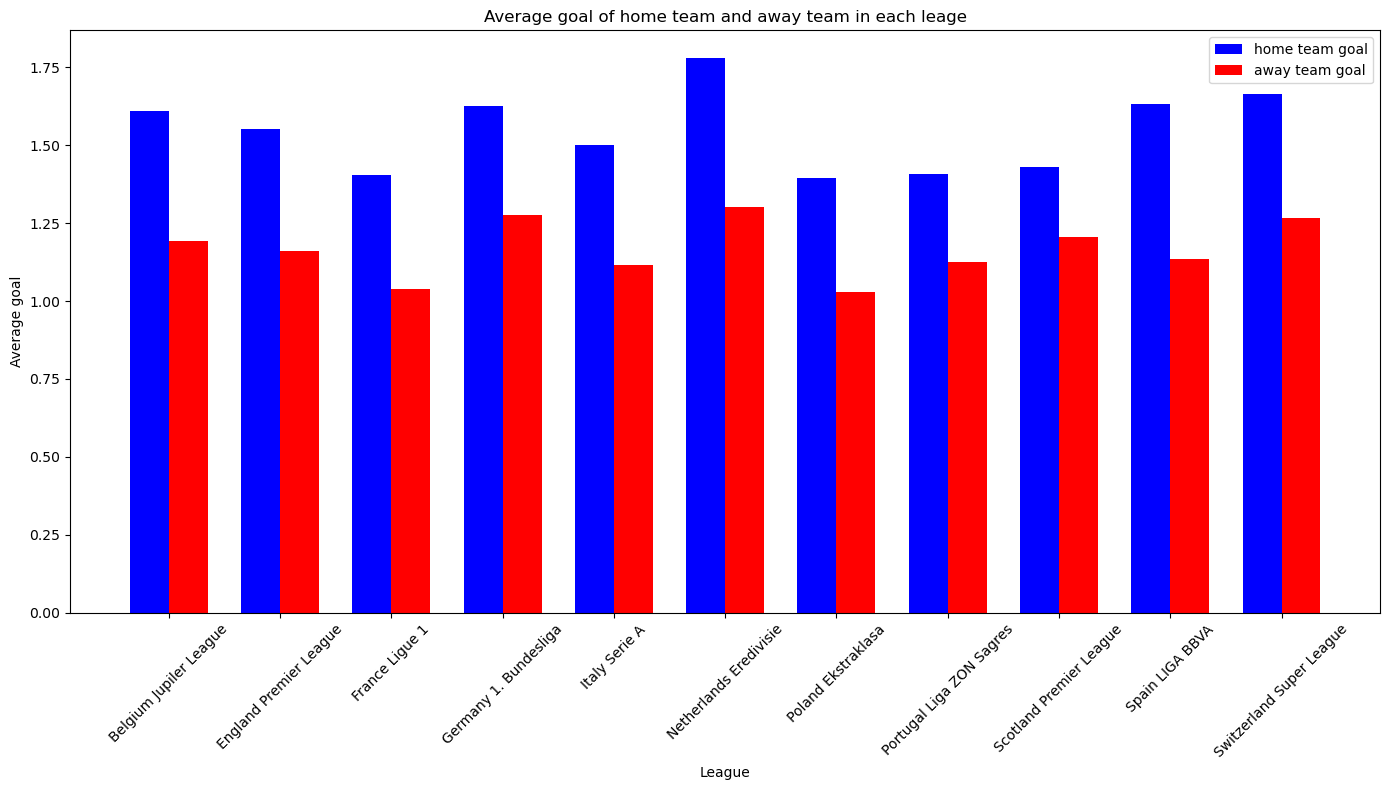

In [14]:
#Chart of average goals scored by home and away teams by league
avg_home_goals = data.groupby('league_name')['home_team_goal'].mean()
avg_away_goals = data.groupby('league_name')['away_team_goal'].mean()

bar_width = 0.35
index = np.arange(len(avg_home_goals))

plt.figure(figsize=(14, 8))
plt.bar(index, avg_home_goals, bar_width, label='home team goal', color='blue')
plt.bar(index + bar_width, avg_away_goals, bar_width, label='away team goal', color='red')

plt.xlabel('League')
plt.ylabel('Average goal')
plt.title('Average goal of home team and away team in each leage')
plt.xticks(index + bar_width / 2, avg_home_goals.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

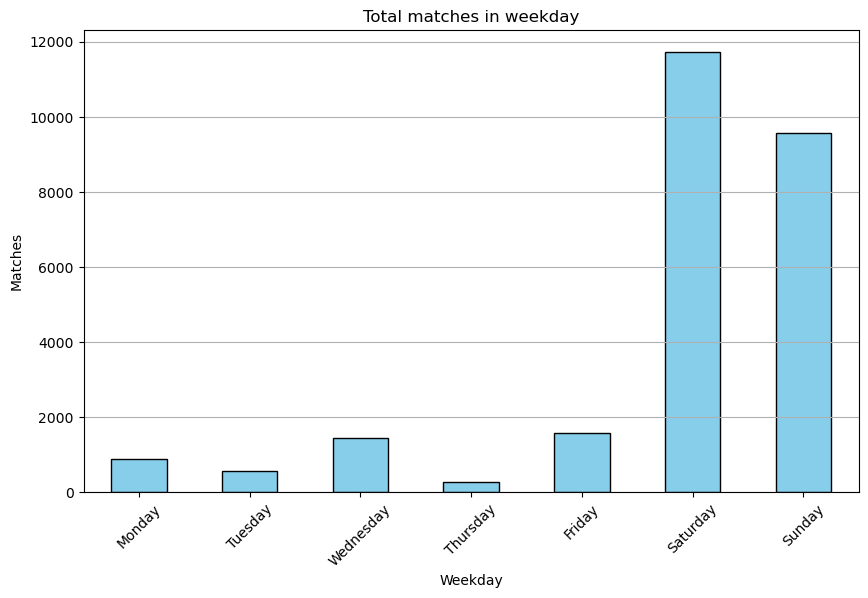

In [15]:
#Chart of total number of matches played according to days of the week
count_by_day = data['weekday'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_by_day = count_by_day.reindex(day_order, fill_value=0)

plt.figure(figsize=(10, 6))
count_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total matches in weekday')
plt.xlabel('Weekday')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

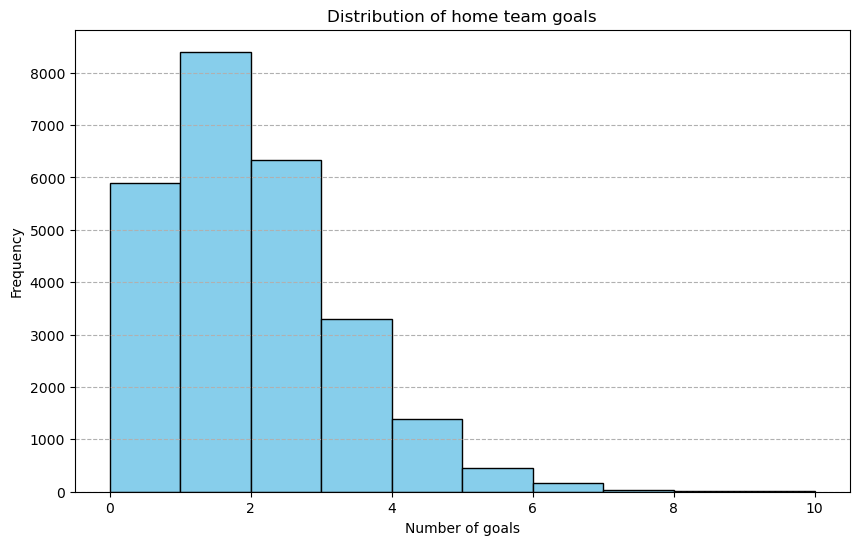

In [16]:
#Chart represents the distribution of home team goals
plt.figure(figsize=(10, 6))
plt.hist(data['home_team_goal'], bins=range(int(data['home_team_goal'].min()), int(data['home_team_goal'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of home team goals')
plt.xlabel('Number of goals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

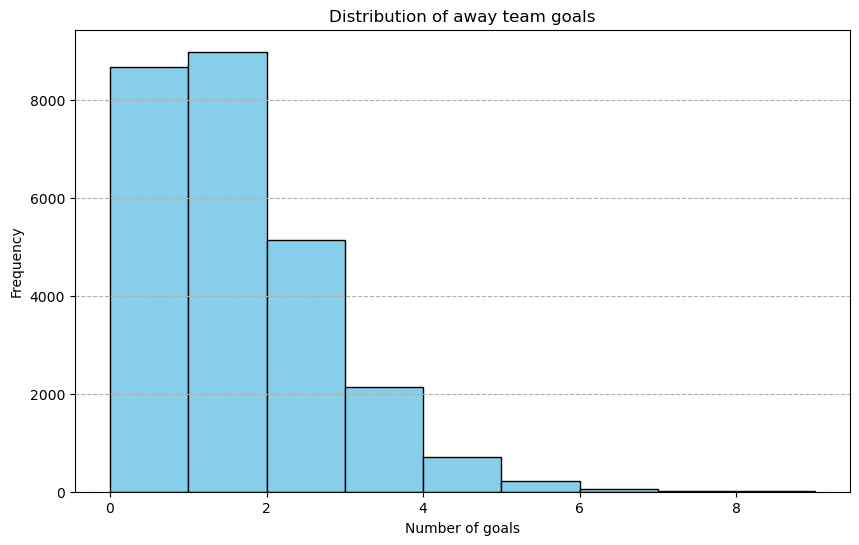

In [17]:
#Chart represents the distribution of away team goals
plt.figure(figsize=(10, 6))
plt.hist(data['away_team_goal'], bins=range(int(data['away_team_goal'].min()), int(data['away_team_goal'].max()) + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of away team goals')
plt.xlabel('Number of goals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

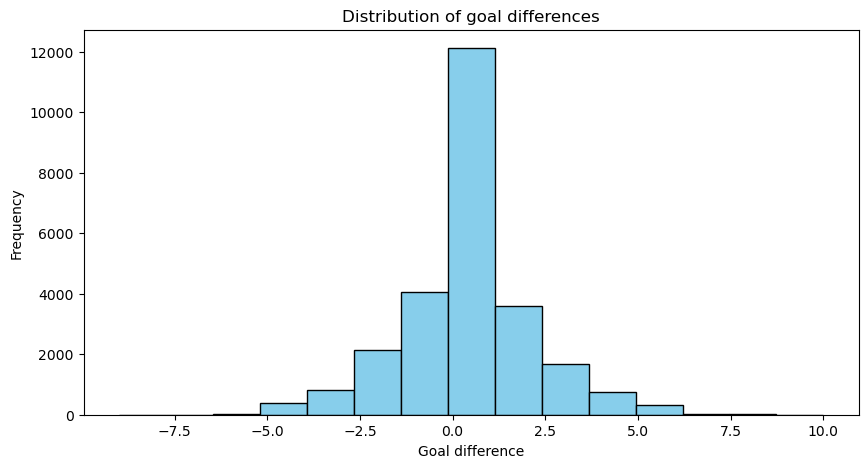

In [40]:
#Chart of goal difference between home and away teams
plt.figure(figsize=(10, 5))
data['diff_goals'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of goal differences')
plt.xlabel('Goal difference')
plt.ylabel('Frequency')
plt.show()

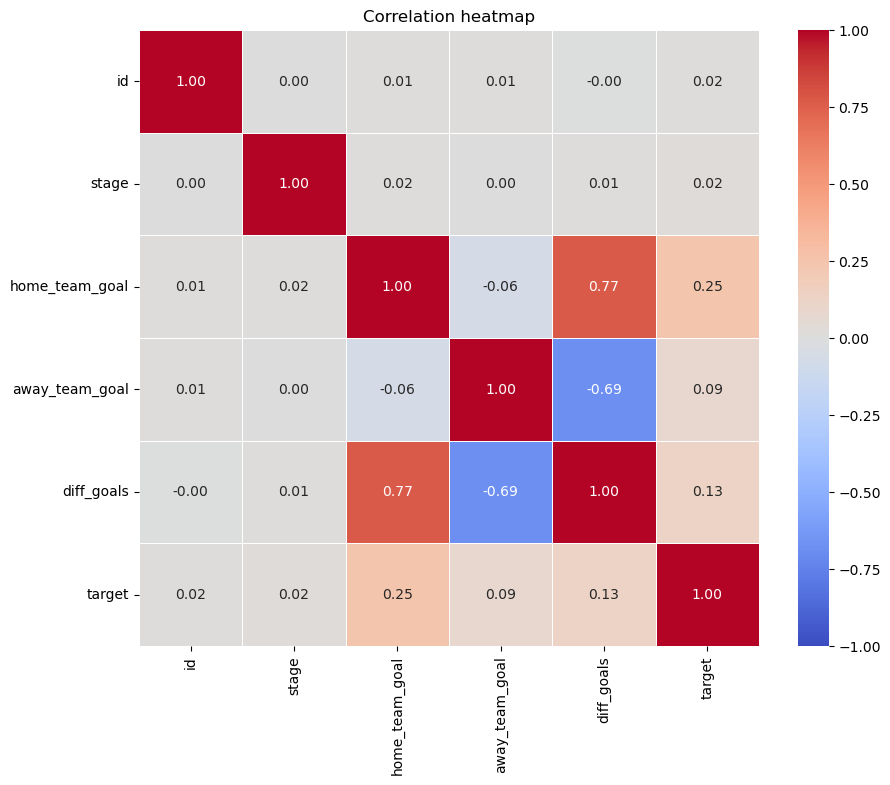

In [41]:
#Heat chart shows the relationship between columns
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

<h1>Analyze data</h1>

<h3>Taking a random sample of 50 matches from the dataset</h3>

In [21]:
pd.set_option('display.expand_frame_repr', False)

sampled_data = data.sample(n=50, random_state=42)
print(sampled_data)

          id country_name               league_name     season  stage                 home_team                away_team  home_team_goal  away_team_goal  diff_goals  target   weekday day month  year
24190  12969        Italy             Italy Serie A  2015/2016     16                     Milan            Hellas Verona               1               1           0       0    Sunday  13    12  2015
7681   11051        Italy             Italy Serie A  2010/2011     12                Fiorentina                   Cesena               1               0           1       1  Saturday  13    11  2010
20672  12567        Italy             Italy Serie A  2014/2015     14                Fiorentina                 Juventus               0               0           0       0    Friday  05    12  2014
2565   15841       Poland        Poland Ekstraklasa  2008/2009     22               Arka Gdynia           Legia Warszawa               0               1          -1       1  Saturday  04    04  2009
19589

In [22]:
sampled_data.describe()

,id,stage,home_team_goal,away_team_goal,diff_goals,target
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,11990.480000,18.000000,1.660000,1.040000,0.620000,0.820000
std,7113.101503,10.245955,1.205599,1.124132,1.664638,0.388088
min,705.000000,1.000000,0.000000,0.000000,-4.000000,0.000000
25%,6170.250000,8.000000,1.000000,0.000000,0.000000,1.000000
50%,11638.000000,19.000000,1.500000,1.000000,1.000000,1.000000
75%,16202.500000,27.500000,2.000000,1.000000,1.750000,1.000000
max,24579.000000,34.000000,5.000000,5.000000,4.000000,1.000000


<h3>Hypothesis 1: The average number of goals scored by home teams is the same as that scored by away teams.</h3>

In [77]:
#The difference in goals between home and away teams
goal_diff = home_goals - away_goals

#The mean and standard error of the mean difference
mean_diff = np.mean(goal_diff)
sem_diff = stats.sem(goal_diff)

#95% confidence interval
confidence_level = 0.95
degrees_freedom = len(goal_diff) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean_diff, scale=sem_diff)

print(f"95% confidence interval: {confidence_interval}")

95% confidence interval: (0.14691505193862064, 1.0930849480613793)


H0: avg_goals_home = avg_goals_away  
H1: avg_goals_home != avg_goals_away

In [78]:
home_goals = sampled_data['home_team_goal']
away_goals = sampled_data['away_team_goal']

t_stat_h1, p_value_h1 = stats.ttest_rel(home_goals, away_goals, alternative='greater')
print(f"'t_stat': {t_stat_h1}, 'p_value': {p_value_h1}")

't_stat': 2.63364254585939, 'p_value': 0.005635926798190503


p_value = 0.0056 > 0.05, we fail to reject H0.  
-->The average number of goals scored by home teams different from that scored by away teams at alpha = 0.05.

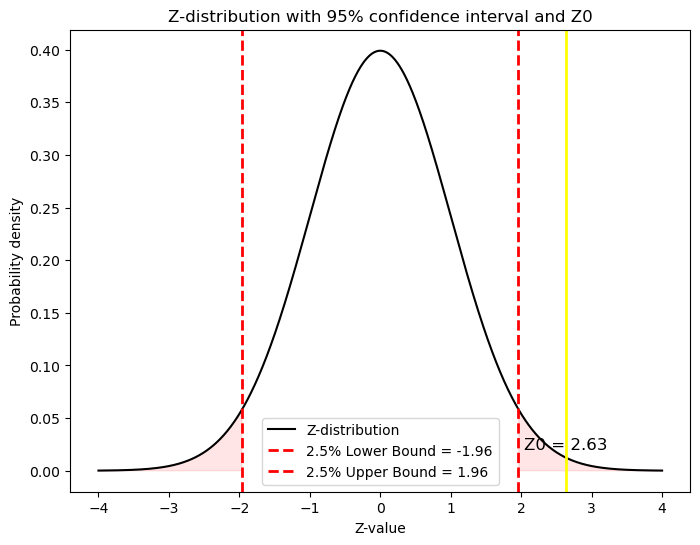

In [79]:
z_value = (t_stat_h1 - 0) / 1

#Create a standard normal distribution for plotting
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

#Plot the Z-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Z-distribution', color='black')
plt.fill_between(x, y, where=((x > 1.96) | (x < -1.96)), color='red', alpha=0.1)

#Mark the Z-value
plt.axvline(x=z_value, color='yellow', linestyle='-', linewidth=2)
plt.text(z_value, 0.02, f'Z0 = {round(z_value, 2)}', fontsize=12, color='black', ha='center')

#Mark the confidence interval boundaries
plt.axvline(x=-1.96, color='red', linestyle='--', linewidth=2, label='2.5% Lower Bound = -1.96')
plt.axvline(x=1.96, color='red', linestyle='--', linewidth=2, label='2.5% Upper Bound = 1.96')

plt.title('Z-distribution with 95% confidence interval and Z0')
plt.xlabel('Z-value')
plt.ylabel('Probability density')
plt.legend()

plt.show()

<h3>Hypothesis 2: The difference in goals (home goals - away goals) is different between matches played on weekends and weekdays.</h3>

In [80]:
#The mean and standard error for both weekend and weekday goal differences
mean_weekend = np.mean(weekend_diff)
sem_weekend = stats.sem(weekend_diff)

mean_weekday = np.mean(weekday_diff)
sem_weekday = stats.sem(weekday_diff)

#95% confidence intervals for both weekend and weekday
confidence_level = 0.95
df_weekend = len(weekend_diff) - 1
df_weekday = len(weekday_diff) - 1

confidence_interval_weekend = stats.t.interval(confidence_level, df_weekend, loc=mean_weekend, scale=sem_weekend)
confidence_interval_weekday = stats.t.interval(confidence_level, df_weekday, loc=mean_weekday, scale=sem_weekday)

print(f"Weekend mean difference: {mean_weekend}")
print(f"Weekend 95% confidence interval: {confidence_interval_weekend}")

print(f"Weekday mean difference: {mean_weekday}")
print(f"Weekday 95% confidence interval: {confidence_interval_weekday}")

Weekend mean difference: 0.6666666666666666
Weekend 95% confidence interval: (0.17885670337171733, 1.154476629961616)
Weekday mean difference: 0.2
Weekday 95% confidence interval: (-2.4918634023379056, 2.891863402337906)


H0: diff_goals_weekends = diff_goals_weekdays  
H1: diff_goals_weekends != diff_goals_weekdays

In [81]:
sampled_data['is_weekend'] = sampled_data['weekday'].isin(['Saturday', 'Sunday'])

#Separate the goal differences into weekend and weekday
weekend_diff = sampled_data[sampled_data['is_weekend']]['diff_goals']
weekday_diff = sampled_data[~sampled_data['is_weekend']]['diff_goals']

#Perform test
t_stat_h2, p_value_h2 = stats.ttest_ind(weekend_diff, weekday_diff)

print(f"'t_stat': {t_stat_h2}, 'p_value': {p_value_h2}")

't_stat': 0.5907295695429036, 'p_value': 0.5574730255069194


p-value = 0.557 > 0.05, we fail to reject H0.  
-->The difference in goals is not different between weakends and weekdays at alpha = 0.05.

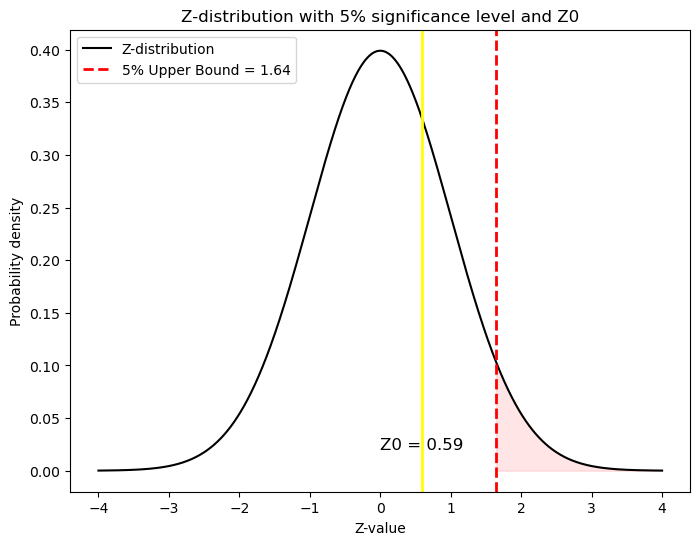

In [82]:
#Z-value
z_value = t_stat_h2

#Create a standard normal distribution for plotting
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

#Plot the Z-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Z-distribution', color='black')
plt.fill_between(x, y, where=(x > 1.64), color='red', alpha=0.1)

#Mark the Z-value
plt.axvline(x=z_value, color='yellow', linestyle='-', linewidth=2)
plt.text(z_value, 0.02, f'Z0 = {round(z_value, 2)}', fontsize=12, color='black', ha='center')

#Mark the significance level boundary
plt.axvline(x=1.64, color='red', linestyle='--', linewidth=2, label='5% Upper Bound = 1.64')

plt.title('Z-distribution with 5% significance level and Z0')
plt.xlabel('Z-value')
plt.ylabel('Probability density')
plt.legend()

plt.show()

<h3>Hypothesis 3: The proportion of matches won by the home team is higher on weekends than on weekdays.</h3>

In [83]:
#95% confidence interval for the difference in proportions
confint_weekend = sm.stats.proportion_confint(count=weekend_home_win, nobs=n_weekend, alpha=0.05, method='normal')
confint_weekday = sm.stats.proportion_confint(count=weekday_home_win, nobs=n_weekday, alpha=0.05, method='normal')

#Difference in proportions
diff_proportion = (weekend_home_win / n_weekend) - (weekday_home_win / n_weekday)

print(f"Difference in proportion of home wins (Weekend - Weekday): {diff_proportion}")
print(f"95% confidence interval for the difference in proportions: ({confint_weekend[0] - confint_weekday[1]}, {confint_weekend[1] - confint_weekday[0]})")

Difference in proportion of home wins (Weekend - Weekday): 0.19999999999999996
95% confidence interval for the difference in proportions: (-0.37254212598949044, 0.7431355314973725)


H0: weekends_won_home_team <= weekdays_won_home_team  
H1: weekends_won_home_team > weekdays_won_home_team

In [84]:
sampled_data['home_win'] = sampled_data['home_team_goal'] > sampled_data['away_team_goal']

#Proportions of home wins on weekends and weekdays
weekend_home_win = sampled_data[sampled_data['is_weekend']]['home_win'].sum()
weekday_home_win = sampled_data[~sampled_data['is_weekend']]['home_win'].sum()

#Number of weekends and weekdays
n_weekend = sampled_data[sampled_data['is_weekend']].shape[0]
n_weekday = sampled_data[~sampled_data['is_weekend']].shape[0]

#Perform a proportion z-test
z_stat_h3, p_value_h3 = proportions_ztest([weekend_home_win, weekday_home_win],
                                          [n_weekend, n_weekday])

print(f"'t_stat': {z_stat_h3}, 'p_value': {p_value_h3}")

't_stat': 0.8596023825918789, 'p_value': 0.39000826120285625


p-value = 0.39 > 0.05, We fail to reject H0.  
-->The proportion of matches won by the home team is not higher on weekends than on weekdays at alpha = 0.05.

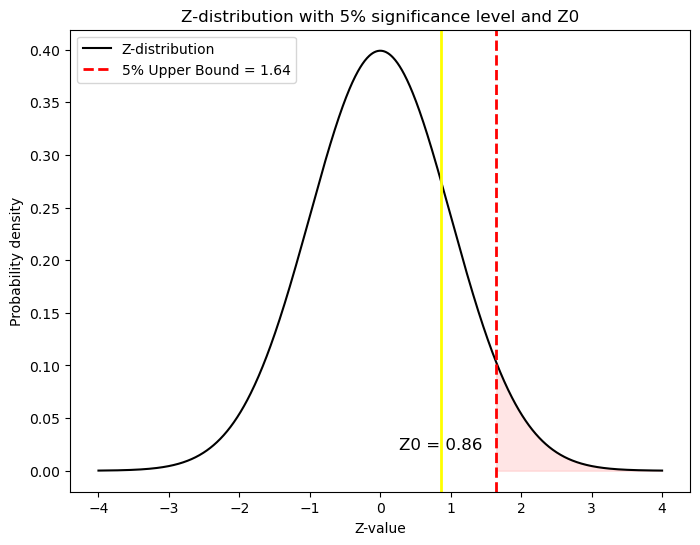

In [85]:
#Create a standard normal distribution for plotting
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

#Plot the Z-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Z-distribution', color='black')
plt.fill_between(x, y, where=(x > 1.64), color='red', alpha=0.1)

#Mark the Z-value
plt.axvline(x=z_stat_h3, color='yellow', linestyle='-', linewidth=2)
plt.text(z_stat_h3, 0.02, f'Z0 = {round(z_stat_h3, 2)}', fontsize=12, color='black', ha='center')

#Mark the significance level boundary
plt.axvline(x=1.64, color='red', linestyle='--', linewidth=2, label='5% Upper Bound = 1.64')

plt.title('Z-distribution with 5% significance level and Z0')
plt.xlabel('Z-value')
plt.ylabel('Probability density')
plt.legend()

plt.show()

<h3>Hypothesis 4: The average number of goals scored by teams differs between France and England.</h3>

In [86]:
#The means and standard errors
mean_france = np.mean(france_goals)
mean_england = np.mean(england_goals)
sem_france = stats.sem(france_goals)
sem_england = stats.sem(england_goals)

#95% confidence interval for the difference in means
confidence_level = 0.95
diff_means = mean_france - mean_england
se_diff = np.sqrt(sem_france**2 + sem_england**2)
confidence_interval = stats.norm.interval(confidence_level, loc=diff_means, scale=se_diff)

print(f"Mean difference in goals (France - England): {diff_means}")
print(f"95% confidence interval for the difference in means: {confidence_interval}")

Mean difference in goals (France - England): 1.4285714285714286
95% confidence interval for the difference in means: (-0.28984590754858286, 3.1469887646914403)


H0: avg_goals_France = avg_goals_England  
H1: avg_goals_France != avg_goals_England

In [87]:
#Filter data of France and England matches
france_goals = sampled_data[sampled_data['country_name'] == 'France']['home_team_goal'] + sampled_data[sampled_data['country_name'] == 'France']['away_team_goal']

england_goals = sampled_data[sampled_data['country_name'] == 'England']['home_team_goal'] + sampled_data[sampled_data['country_name'] == 'England']['away_team_goal']

#Perform test
t_stat_h4, p_value_h4 = stats.ttest_ind(france_goals, england_goals)

print(f"'t_stat': {t_stat_h4}, 'p_value': {p_value_h4}")

't_stat': 1.6293763397807055, 'p_value': 0.12918444179377886


p-value = 0.129 > 0.05, We fail to reject H0.  
-->The difference in average goals scored by home and away teams is not statistically significant at alpha = 0.05.

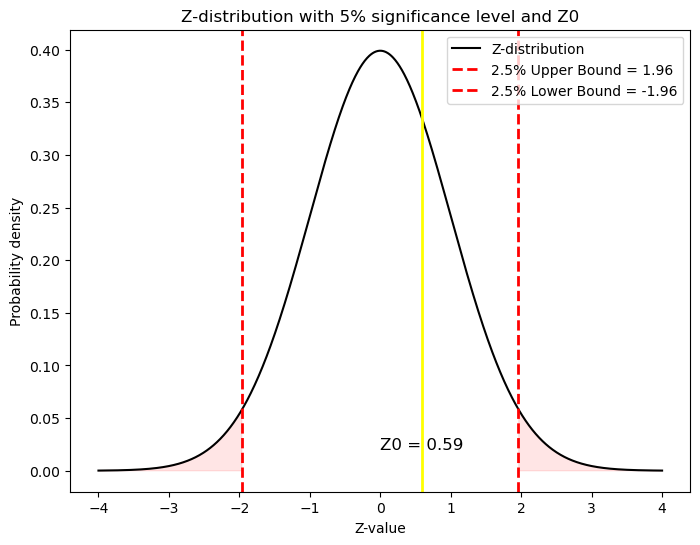

In [88]:
#Create a standard normal distribution for plotting
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

#Plot the Z-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Z-distribution', color='black')
plt.fill_between(x, y, where=((x > 1.96) | (x < -1.96)), color='red', alpha=0.1)

#Mark the Z-value
plt.axvline(x=z_value, color='yellow', linestyle='-', linewidth=2)
plt.text(z_value, 0.02, f'Z0 = {round(z_value, 2)}', fontsize=12, color='black', ha='center')

#Mark the significance level boundaries
plt.axvline(x=1.96, color='red', linestyle='--', linewidth=2, label='2.5% Upper Bound = 1.96')
plt.axvline(x=-1.96, color='red', linestyle='--', linewidth=2, label='2.5% Lower Bound = -1.96')

plt.title('Z-distribution with 5% significance level and Z0')
plt.xlabel('Z-value')
plt.ylabel('Probability density')
plt.legend()

plt.show()